# SKLearn.XGBoost

sklearn.ensemble.RandomForestClassifier:

In [1]:
from sklearn import ensemble, cross_validation, learning_curve, metrics

import numpy as np
import pandas as pd
import xgboost as xgb

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Данные

Задача на kaggle: https://www.kaggle.com/c/bioresponse

Данные: https://www.kaggle.com/c/bioresponse/data

По данным характеристикам молекулы требуется определить, будет ли дан биологический ответ (biological response).

Признаки нормализаваны.

Для демонстрации используется обучающая выборка из исходных данных train.csv, файл с данными прилагается.

In [3]:
bioresponse = pd.read_csv('bioresponse.csv', header=0,  sep=',')
bioresponse.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [6]:
bioresponse_target=bioresponse.Activity
bioresponse_data=bioresponse.iloc[:, 1:]

Композитные алгоритмы  случайный лес и градиентный бустинг зависят  от качество базовых алгоритмов над которыми они строятся . Проанализируем зависимость качества алгоритмов от количества деревьев над которыми они строятся

# Модель RandomForestClassifier

зависимость качества алгоритмов от количества деревьев

In [8]:
n_trees=[1] + range (10, 55, 5)

In [10]:
%%time
scoring=[]
for n_tree in n_trees:
    estimator=ensemble.RandomForestClassifier(n_estimators=n_tree, min_samples_split=5)
    score = cross_validation.cross_val_score(estimator, bioresponse_data, bioresponse_target
                                             , scoring='accuracy', cv=3)
    scoring.append(score)
scoring=np.asmatrix(scoring)

Wall time: 0 ns


In [11]:
scoring

matrix([[ 0.68265388,  0.6664    ,  0.692     ],
        [ 0.7529976 ,  0.752     ,  0.7624    ],
        [ 0.76019185,  0.7656    ,  0.7768    ],
        [ 0.78097522,  0.7776    ,  0.7912    ],
        [ 0.77378098,  0.7712    ,  0.7952    ],
        [ 0.7873701 ,  0.7808    ,  0.7936    ],
        [ 0.78816946,  0.7728    ,  0.7976    ],
        [ 0.80095923,  0.7728    ,  0.8048    ],
        [ 0.78896882,  0.7848    ,  0.8       ],
        [ 0.79456435,  0.7904    ,  0.8016    ]])

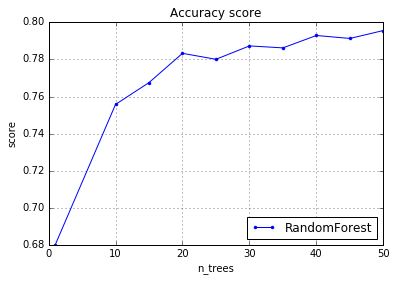

In [14]:
pyplot.plot(n_trees, scoring.mean(axis=1), marker='.', label='RandomForest')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')

# Градиентный бустинг

Кривые обучения для деревьев большей длины

In [15]:
%%time
xgb_scoring=[]
for n_tree in n_trees:
    estimator=xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=n_tree
                                , min_child_weight=3)
    score = cross_validation.cross_val_score(estimator, bioresponse_data, bioresponse_target
                                             , scoring='accuracy', cv=3)
    xgb_scoring.append(score)
xgb_scoring=np.asmatrix(xgb_scoring)

Wall time: 0 ns


In [16]:
xgb_scoring

matrix([[ 0.76498801,  0.756     ,  0.756     ],
        [ 0.77617906,  0.7752    ,  0.7688    ],
        [ 0.77857714,  0.7744    ,  0.7768    ],
        [ 0.7873701 ,  0.7784    ,  0.7768    ],
        [ 0.79216627,  0.7736    ,  0.7832    ],
        [ 0.79776179,  0.7776    ,  0.7824    ],
        [ 0.79616307,  0.7816    ,  0.78      ],
        [ 0.79296563,  0.7848    ,  0.7792    ],
        [ 0.79856115,  0.7832    ,  0.7808    ],
        [ 0.79936051,  0.7832    ,  0.7832    ]])

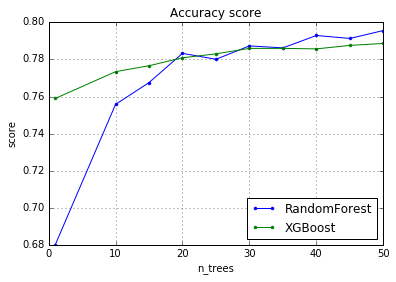

In [17]:
#сравним оба алгоритма
pyplot.plot(n_trees, scoring.mean(axis=1), marker='.', label='RandomForest')
pyplot.plot(n_trees, xgb_scoring.mean(axis=1), marker='.', label='XGBoost')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')


#как видим оба алгоритма имеют высокое качество но XGB достигает его быстрее

Если Вас заинтересовал xgboost:

python api: http://xgboost.readthedocs.org/en/latest/python/python_api.html

установка: http://xgboost.readthedocs.io/en/latest/build.html
